In [3]:
#1. Problem Statement ---------------
#The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it.
#So, the task is to classify racist or sexist tweets from other tweets.'''

In [4]:
# 2. Tweets Preprocessing and Cleaning

In [8]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [17]:
train= pd.read_csv('./Data/train_tweets.csv')
test= pd.read_csv('./Data/test_tweets.csv')


In [28]:
pd.set_option("display.max_colwidth", 200) 


In [31]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [32]:
train.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððððððâ¤ï¸
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher
31959,31960,0,listening to sad songs on a monday morning otw to work is sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary, #wso condemns act"
31961,31962,0,thank you @user for you follow


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [34]:
train.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [36]:
#3. A) Removing Twitter Handles (@user)
#Given below is a user-defined function to remove unwanted text patterns from the tweets. 
#It takes two arguments, one is the original string of text and the other is the pattern of text that we want to remove from the string.
#The function returns the same input string but without the given pattern. 
#We will use this function to remove the pattern ‘@user’ from all the tweets in our data.



In [40]:
combi= train.append(test, ignore_index=True)

In [48]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [126]:
#creating 'tidy_tweet' new column will contain cleaned and processed tweets
# @[\w]*  - remove words which starting with @ ex.@user
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], '@[\w]*')
combi['tidy_tweet']

0                                                          when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
1                                           thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
2                                                                                                                                      bihday your majesty
3                                                                   #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦  
4                                                                                                                   factsguide: society now    #motivation
                                                                               ...                                                                        
49154                                         thought factory: left-ri

In [134]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z0-9]", " ")
#removed all special characters



In [135]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for lyft credit i can t use cause they don t offer wheelchair vans in pdx disapointed getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now motivation


In [136]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
#removed the words having length<3 characters

In [137]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks lyft credit cause they offer wheelchair vans disapointed getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society motivation


In [146]:
#Tokenization
tokenized_tweet= combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                   [when, father, dysfunctional, selfish, drags, kids, into, dysfunction]
1    [thanks, lyft, credit, cause, they, offer, wheelchair, vans, disapointed, getthanked]
2                                                                  [bihday, your, majesty]
3                                                          [model, love, take, with, time]
4                                                        [factsguide, society, motivation]
Name: tidy_tweet, dtype: object

In [154]:
#Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word.
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0                     [when, father, dysfunct, selfish, drag, kid, into, dysfunct]
1    [thank, lyft, credit, cau, they, offer, wheelchair, van, disapoint, getthank]
2                                                          [bihday, your, majesti]
3                                                  [model, love, take, with, time]
4                                                      [factsguid, societi, motiv]
Name: tidy_tweet, dtype: object

0                     [when, father, dysfunct, selfish, drag, kid, into, dysfunct]
1    [thank, lyft, credit, cau, they, offer, wheelchair, van, disapoint, getthank]
2                                                          [bihday, your, majesti]
3                                                  [model, love, take, with, time]
4                                                      [factsguid, societi, motiv]
Name: tidy_tweet, dtype: object

In [244]:
#Now let’s stitch these tokens back together.

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ''.join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet

In [245]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,w h e n ...
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,t h a n ...
2,3,0.0,bihday your majesty,b i h d ...
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,m o d e ...
4,5,0.0,factsguide: society now #motivation,f a c t ...


In [240]:
combi['tidy_tweet']

0        w                                                               h                                                               e                                                               n   ...
1        t                                                               h                                                               a                                                               n   ...
2        b                                                               i                                                               h                                                               d   ...
3        m                                                               o                                                               d                                                               e   ...
4        f                                                               a                                                               c                          

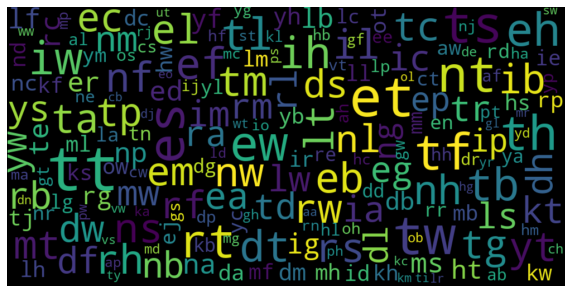

In [249]:
all_words = ''.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=1000, height=500, random_state=21,background_color='black', max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
